# 用Pandas做特征工程

数据集来源于Data Hackathon 3.x
这是一个贷款信息的数据集
我们来做点微小的工作

### 加载需要的库:

In [63]:
import pandas as pd
import numpy as np
%matplotlib inline

In [64]:
#载入数据:
train = pd.read_csv('Train.csv', encoding='latin-1')
test = pd.read_csv('Test.csv', encoding='latin-1')

In [65]:
train.shape, test.shape

((87020, 26), (37717, 24))

### 看看数据的基本情况

In [66]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

### 拿前5条出来看看

In [67]:
train.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [68]:
#合成一个总的data
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

### 数据应用/建模一个很重要的工作是，你要看看异常点，比如说缺省值

In [69]:
data.apply(lambda x: sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

### 要对数据有更深的认识，

比如说，咱们看看这些字段，分别有多少种不同的取值

当然，你也可以画图来看。。。就是装逼了点儿而已。

In [70]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print('\n%s这一列数据的不同取值和出现的次数\n'%v)
    print(data[v].value_counts())


Gender这一列数据的不同取值和出现的次数

Male      71398
Female    53339
Name: Gender, dtype: int64

Salary_Account这一列数据的不同取值和出现的次数

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank            

### 紧接着你就可以开始处理你的字段(特征)了

我这里只做了一些简单的处理，你大可在我的基础上做更复杂的特征处理

因为这个case里，我们并没有明确的目标--》我们到底需要做什么

我只是随手拿了个数据集来玩玩，

所以，我也只是按照意识流随意处理一下数据，让大家感受一下：

『假如我真的需要这样做，我该怎么操作』

所以，等会儿不要问『为什么』。

### City字段处理

In [71]:
len(data['City'].unique())

724

好像city的类型好多，

不利于做ML的统计和回归,

粗暴一点，这个字段咱们不要了

In [72]:
data.drop('City',axis=1,inplace=True)

### DOB字段处理

DOB是出生的具体日期，咱们要具体日期作用没那么大，

年龄段可能对我们有用，所有算一下年龄好了

In [73]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [74]:
#创建一个年龄的字段Age
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [75]:
#把原始的DOB字段去掉:
data.drop('DOB',axis=1,inplace=True)

### EMI_Loan_Submitted字段处理

这个一定是重点数据，因为这个数据集的其他信息都是在为它服务（借贷方的背景信息）

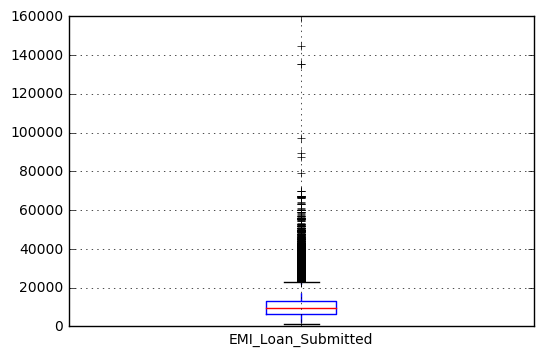

In [76]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

这里，我们用到Lambda。

在Pandas中，你可以自由的使用Lambda方程，来帮你简化程序步骤

In [77]:
#好像缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [78]:
#原始那一列就可以不要了
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

### Employer Name字段处理

#### 看看个数

In [79]:
len(data['Employer_Name'].value_counts())

57193

不看也知道，每个人都有一个名字，太多了

这些零散数据，对后期的ML本身是没有太多帮助的，直接GG

In [80]:
#丢掉
data.drop('Employer_Name',axis=1,inplace=True)

### Existing_EMI字段

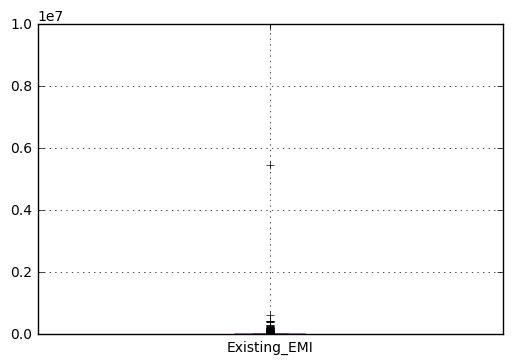

In [81]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [82]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

相比于刚刚，缺省值不是很多，所以，我们可以用平均数来添加进NaN的值里面去

In [83]:
#缺省值不多，用均值代替
data['Existing_EMI'].fillna(0, inplace=True)

### Interest_Rate字段:

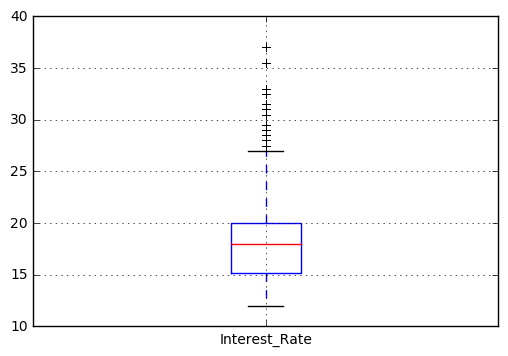

In [84]:
data.boxplot(column=['Interest_Rate'],return_type='axes')

In [85]:
#缺省值太多，也造一个字段，表示有无
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['Interest_Rate','Interest_Rate_Missing']].head(10)

,Interest_Rate,Interest_Rate_Missing
0,NaN,1
1,13.25,0
2,NaN,1
3,NaN,1
4,NaN,1
5,13.99,0
6,NaN,1
7,NaN,1
8,14.85,0
9,18.25,0


In [86]:
data.drop('Interest_Rate',axis=1,inplace=True)

### Lead Creation Date字段

代表什么时候take这个customer的。没啥用

In [87]:
data.drop('Lead_Creation_Date',axis=1,inplace=True)
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HDFC Bank,S122,HBXX,G,1,0,train,37,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,ICICI Bank,S122,HBXA,G,3,13,train,30,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,State Bank of India,S143,HBXX,B,1,0,train,34,1,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,State Bank of India,S143,HBXX,B,3,10,train,28,1,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HDFC Bank,S134,HBXX,B,3,17,train,31,1,1


### Loan Amount and Tenure applied字段

In [88]:
#找中位数去填补缺省值
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [89]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HDFC Bank,S122,HBXX,G,1,0,train,37,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,ICICI Bank,S122,HBXA,G,3,13,train,30,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,State Bank of India,S143,HBXX,B,1,0,train,34,1,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,State Bank of India,S143,HBXX,B,3,10,train,28,1,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HDFC Bank,S134,HBXX,B,3,17,train,31,1,1


### Loan Amount and Tenure selected

In [90]:
# 缺省值太多。。。是否缺省。。。
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [91]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HBXX,G,1,0,train,37,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,HBXA,G,3,13,train,30,0,0,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,HBXX,B,1,0,train,34,1,1,0,0
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,HBXX,B,3,10,train,28,1,1,0,0
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HBXX,B,3,17,train,31,1,1,0,0


In [92]:
#原来的字段就没用了
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

### LoggedIn

In [93]:
#没想好怎么用。。。不要了。。。
data.drop('LoggedIn',axis=1,inplace=True)

### salary account

In [94]:
# 可能对接多个银行，所以也不要了
data.drop('Salary_Account',axis=1,inplace=True)

### Processing_Fee

In [95]:
#和之前一样的处理，有或者没有
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#旧的字段不要了
data.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [96]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

## 最终的数据样式

In [97]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,5.0,N,20000,...,G,1,0,train,37,1,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,2.0,Y,35000,...,G,3,13,train,30,0,0,0,0,1
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,4.0,Y,22500,...,B,1,0,train,34,1,1,0,0,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,5.0,Y,35000,...,B,3,10,train,28,1,1,0,0,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,2.0,Y,100000,...,B,3,17,train,31,1,1,0,0,1


In [98]:
data.describe()

,Disbursed,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
count,87020.000000,1.247370e+05,1.247370e+05,124737.000000,1.247370e+05,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000
mean,0.014629,3.633107e+03,2.298744e+05,2.138075,5.309073e+04,2.950560,4.964774,30.906996,0.680640,0.680640,0.397116,0.397116,0.684208
std,0.120062,3.367642e+04,3.539938e+05,2.014874,1.823394e+06,1.695261,5.669784,7.137860,0.466231,0.466231,0.489302,0.489302,0.464833
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.650000e+04,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,1.000000e+05,2.000000,2.500000e+04,3.000000,2.000000,29.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,3.500000e+03,3.000000e+05,4.000000,4.000000e+04,5.000000,11.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000e+07,1.500000e+07,10.000000,4.445544e+08,7.000000,18.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [100]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

### 数值编码

这是最后，却也是最重要的一步。

表中很多数据是object

但是ML是看不懂object的，算法只看得懂数字。

于是，我们就要用数值的形式来把所有的object表达出来

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [102]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,1,0.0,0.0,0,0,ID000002C20,300000.0,5.0,0,20000,...,6,1,0,train,37,1,1,1,1,1
1,1,0.0,0.0,0,1,ID000004E40,200000.0,2.0,1,35000,...,6,3,13,train,30,0,0,0,0,1
2,1,0.0,0.0,0,1,ID000007H20,600000.0,4.0,1,22500,...,1,1,0,train,34,1,1,0,0,1
3,1,0.0,0.0,0,1,ID000008I30,1000000.0,5.0,1,35000,...,1,3,10,train,28,1,1,0,0,1
4,1,0.0,25000.0,0,1,ID000009J40,500000.0,2.0,1,100000,...,1,3,17,train,31,1,1,0,0,1


In [103]:
data.dtypes

Device_Type                        int64
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                        int64
Gender                             int64
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                    int64
Monthly_Income                     int64
Source                             int64
Var1                               int64
Var2                               int64
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

### 类别型的One-Hot 编码

In [104]:
data = pd.get_dummies(data, columns=var_to_encode)
data.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,source,Age,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,train,37,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,train,30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,train,34,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,train,28,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,train,31,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 区分训练和测试数据

In [105]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [106]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

/Users/AaronSun/Git/.virtualenvs/py/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/AaronSun/Git/.virtualenvs/py/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [107]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)